In [1]:
#data manipulation
import pandas as pd
import numpy as np

 #data visualization
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.inspection import DecisionBoundaryDisplay

#Model Building
# for splititng of data
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, export_text
from sklearn.preprocessing import LabelEncoder

#for building linear regression model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

#for building logistic regression model
from sklearn.linear_model import LogisticRegression

#for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# for decisions tree
from sklearn.tree import DecisionTreeClassifier

# for random forest algorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# for naive-bayes algorithm
from sklearn.naive_bayes import GaussianNB

#for K-Nearest Neighbour algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

#for support-vector mechanism
from sklearn.svm import SVC

#for Extreme Gradient Boosting
import xgboost as xgb

#Pytorch for extensive deep learning
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [101]:
funda = pd.read_csv('/content/fundamentals.csv')
prsp = pd.read_csv('/content/prices-split-adjusted.csv')
prc = pd.read_csv('/content/prices.csv')
sec = pd.read_csv('/content/securities.csv')

In [102]:
funda.isnull().sum()

Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64

In [103]:
funda.shape

(1781, 79)

In [104]:
prsp.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [105]:
prsp.shape

(851264, 7)

In [106]:
prc.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [107]:
prc.shape

(851264, 7)

In [108]:
sec.isnull().sum()

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [109]:
sec.shape

(505, 8)

In [110]:
funda['For Year'] = pd.to_datetime(funda['For Year']).fillna(method='ffill')
funda['Earnings Per Share'] = pd.to_datetime(funda['Earnings Per Share']).fillna(method='ffill')
funda['Estimated Shares Outstanding'] = pd.to_datetime(funda['Estimated Shares Outstanding']).fillna(method='ffill')

In [111]:
sec['Date first added'] = pd.to_datetime(sec['Date first added']).fillna(method='ffill')

In [112]:
funda.columns

Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

In [113]:
columns_of_interest = ['Accounts Payable', 'Accounts Receivable', 'Cash Ratio',
                       'Earnings Before Tax', 'Net Income', 'Operating Margin',
                       'Total Revenue', 'Total Assets', 'Total Liabilities']

funda_subset = funda[columns_of_interest].dropna()

z_scores = (funda_subset - funda_subset.mean()) / funda_subset.std()

threshold = 3


outliers = z_scores[(z_scores > threshold).any(axis=1)]

for ticker_symbol in outliers.index:
    outlier_categories = outliers.loc[ticker_symbol][outliers.loc[ticker_symbol] > threshold].index
    print("Ticker symbol:", funda.loc[ticker_symbol, 'Ticker Symbol'])
    print("Outlier categories:", list(outlier_categories))
    print("Average amount for each category:")
    for category in outlier_categories:
        average_amount = funda_subset[category].mean()
        outlier_count = (outliers.loc[ticker_symbol] > threshold).sum()
        print(f"- {category}: Average = {average_amount:.2f}, Number of outliers = {outlier_count}")
    print()

Ticker symbol: AAPL
Outlier categories: ['Accounts Payable', 'Earnings Before Tax', 'Net Income', 'Total Revenue', 'Total Assets']
Average amount for each category:
- Accounts Payable: Average = 3680650927.13, Number of outliers = 5
- Earnings Before Tax: Average = 2277350867.75, Number of outliers = 5
- Net Income: Average = 1632918735.49, Number of outliers = 5
- Total Revenue: Average = 20772269312.42, Number of outliers = 5
- Total Assets: Average = 26595844854.93, Number of outliers = 5

Ticker symbol: AAPL
Outlier categories: ['Accounts Payable', 'Earnings Before Tax', 'Net Income', 'Total Revenue', 'Total Assets', 'Total Liabilities']
Average amount for each category:
- Accounts Payable: Average = 3680650927.13, Number of outliers = 6
- Earnings Before Tax: Average = 2277350867.75, Number of outliers = 6
- Net Income: Average = 1632918735.49, Number of outliers = 6
- Total Revenue: Average = 20772269312.42, Number of outliers = 6
- Total Assets: Average = 26595844854.93, Number 

In [114]:
sec

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaT,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",2011-11-01,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",1997-10-06,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",1997-10-06,109380


In [115]:
prc.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [116]:
merged_data = pd.merge(sec, prc, left_on='Ticker symbol', right_on='symbol')

grouped_data = merged_data.groupby('GICS Sector')

In [117]:
data = merged_data

In [118]:
data.head(3)

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK,date,symbol,open,close,low,high,volume
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaT,66740,2010-01-04,MMM,83.089996,83.019997,82.669998,83.449997,3043700.0
1,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaT,66740,2010-01-05,MMM,82.800003,82.500000,81.699997,83.230003,2847000.0
2,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaT,66740,2010-01-06,MMM,83.879997,83.669998,83.510002,84.599998,5268500.0


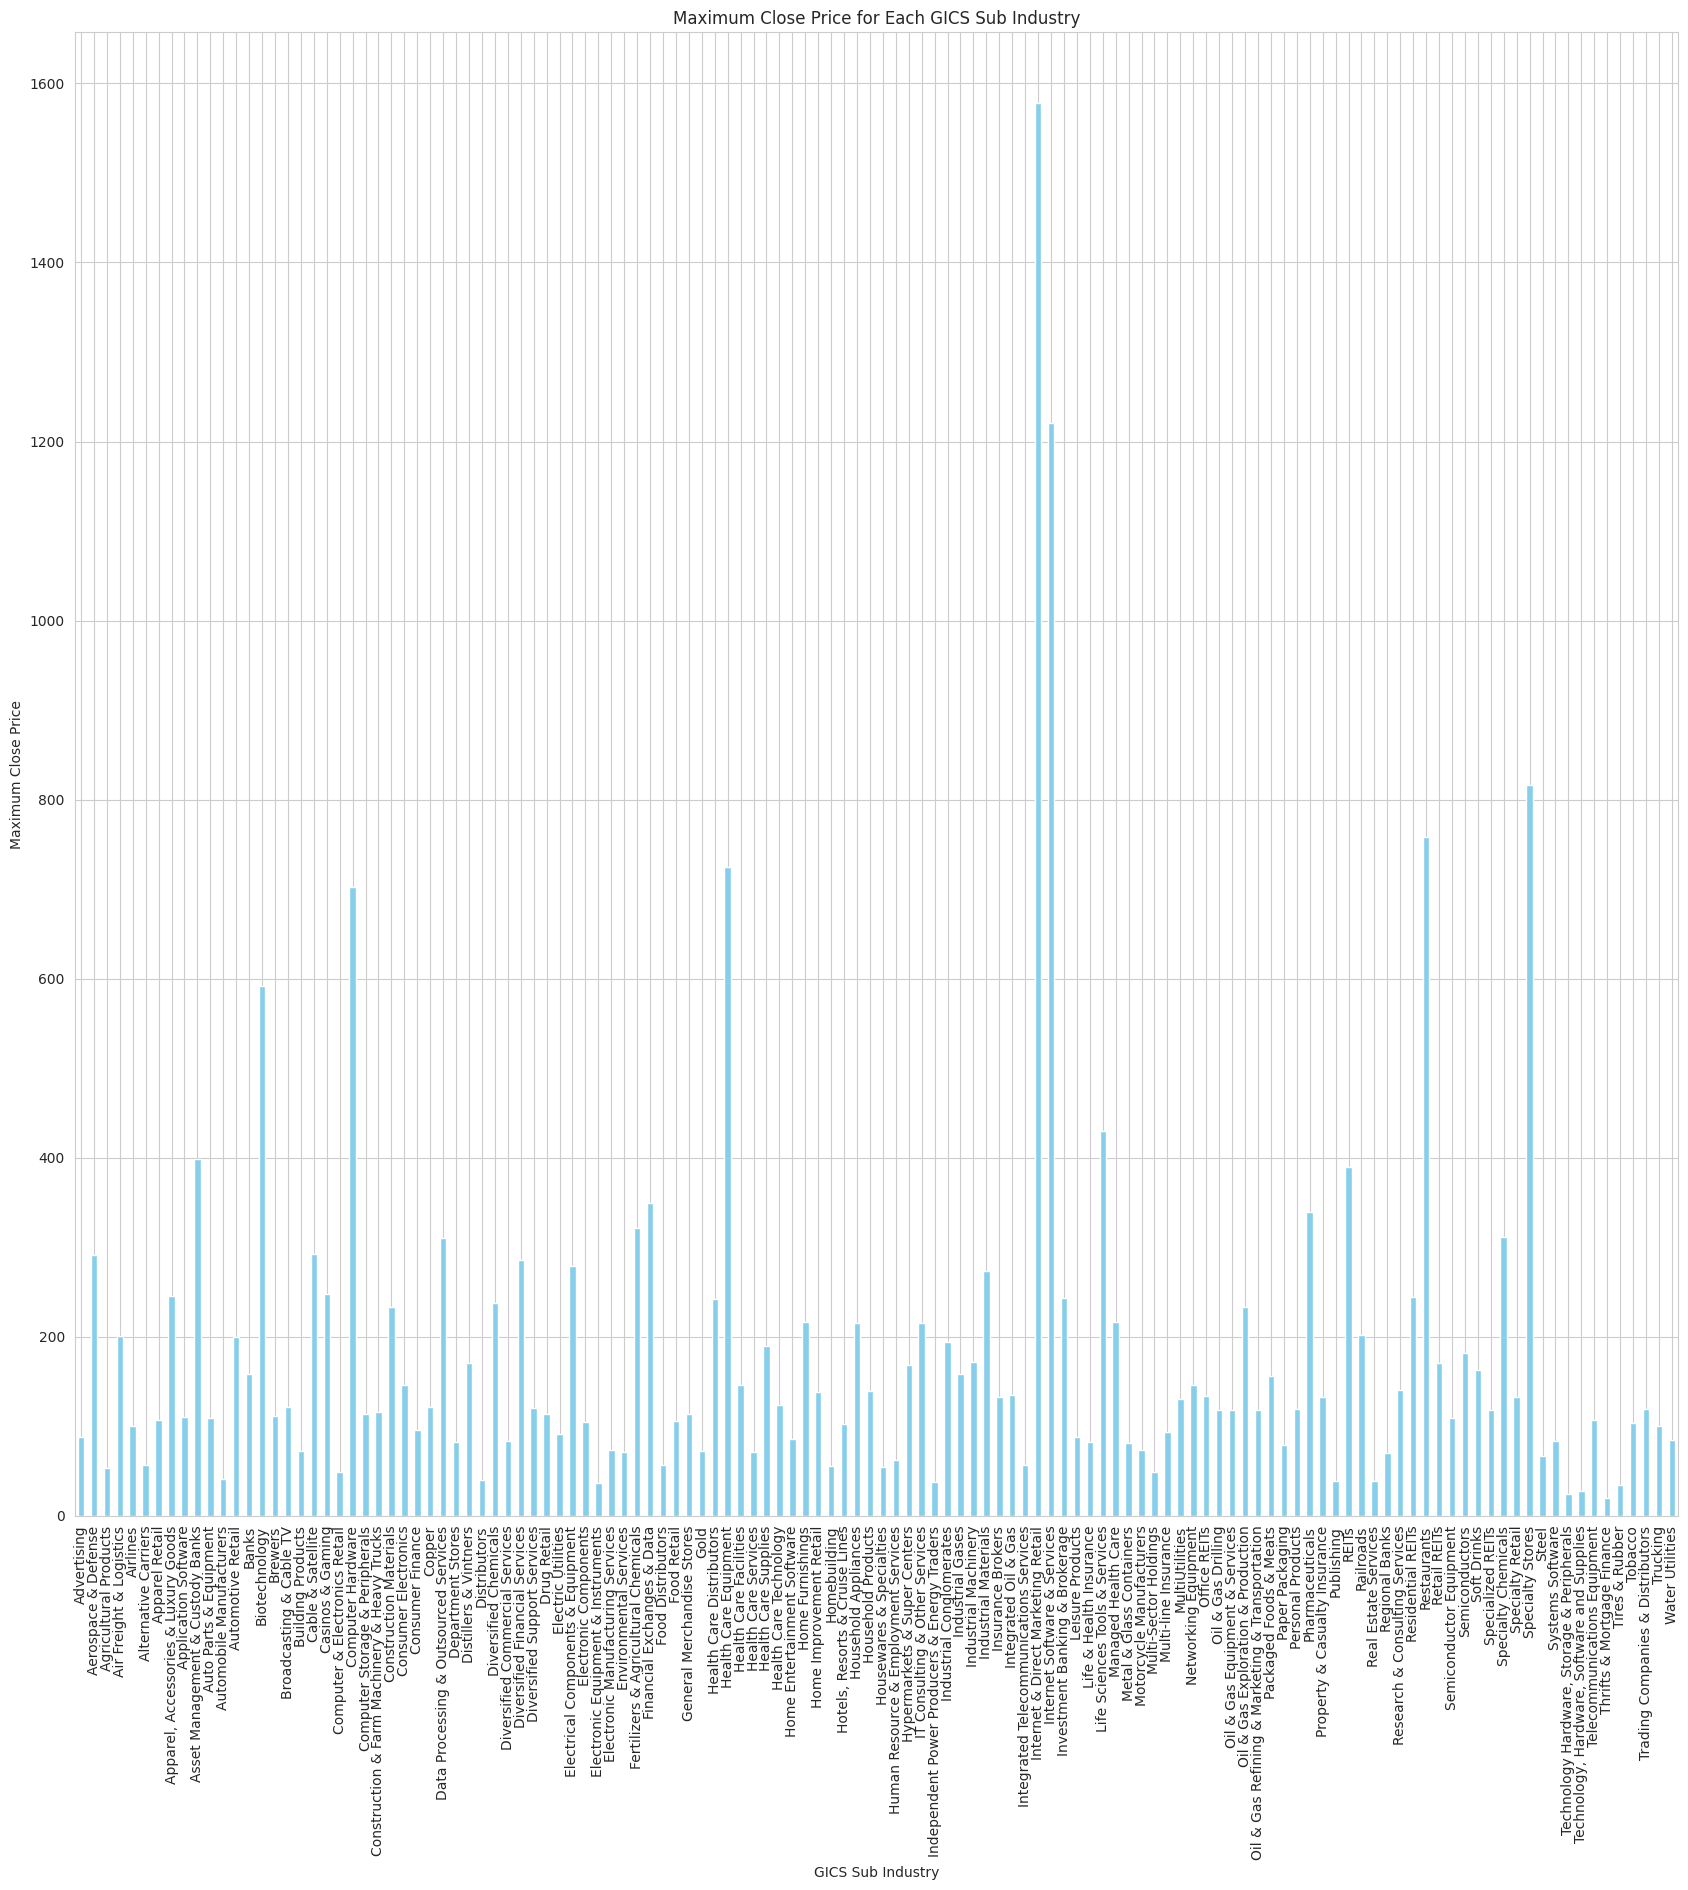

In [119]:
# Calculate the maximum closing price for each GICS Sub Industry
subindustry_max_close = merged_data.groupby('GICS Sub Industry')['close'].max()

# Plotting the bar diagram
plt.figure(figsize=(17,19))
subindustry_max_close.plot(kind='bar', color='skyblue')
plt.xlabel('GICS Sub Industry')
plt.ylabel('Maximum Close Price')
plt.title('Maximum Close Price for Each GICS Sub Industry')
plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Sub-industries with high maximum closing prices: Based on the graph, it appears
that Gold, Copper, and Finance are among the sub-industries with the highest maximum closing prices. This could be due to a number of factors, such as investor demand for these assets during times of economic uncertainty, or strong financial performance by companies in these sectors.

Sub-industries with zero maximum closing price: Some sub-industries, such as Multi-Sector Holdings and Real Estate Services, have a maximum closing price of zero. This could indicate that they are either new entrants to the stock market or haven't had any significant trading activity yet. It's also possible that these sub-industries are not currently represented by any publicly traded companies.

Other sub-industries with zero maximum closing price: Other sub-industries with a maximum closing price of zero include Diversified Fixed Income and Timber & Forest Products. It's possible that these sub-industries are not currently represented by any publicly traded companies, or that the companies within these sub-industries haven't had any major price spikes during the time period covered by the graph.

Sub-industries potentially impacted by economic factors: Sub-industries like Casinos & Gaming and Hotels, Resorts & Cruise Lines might have been impacted by economic downturns or travel restrictions, leading to lower share prices and potentially causing their maximum closing prices to be lower than expected. The travel and hospitality industries are often sensitive to economic conditions, and companies in these sectors may see their stock prices decline during recessions or periods of high uncertainty.



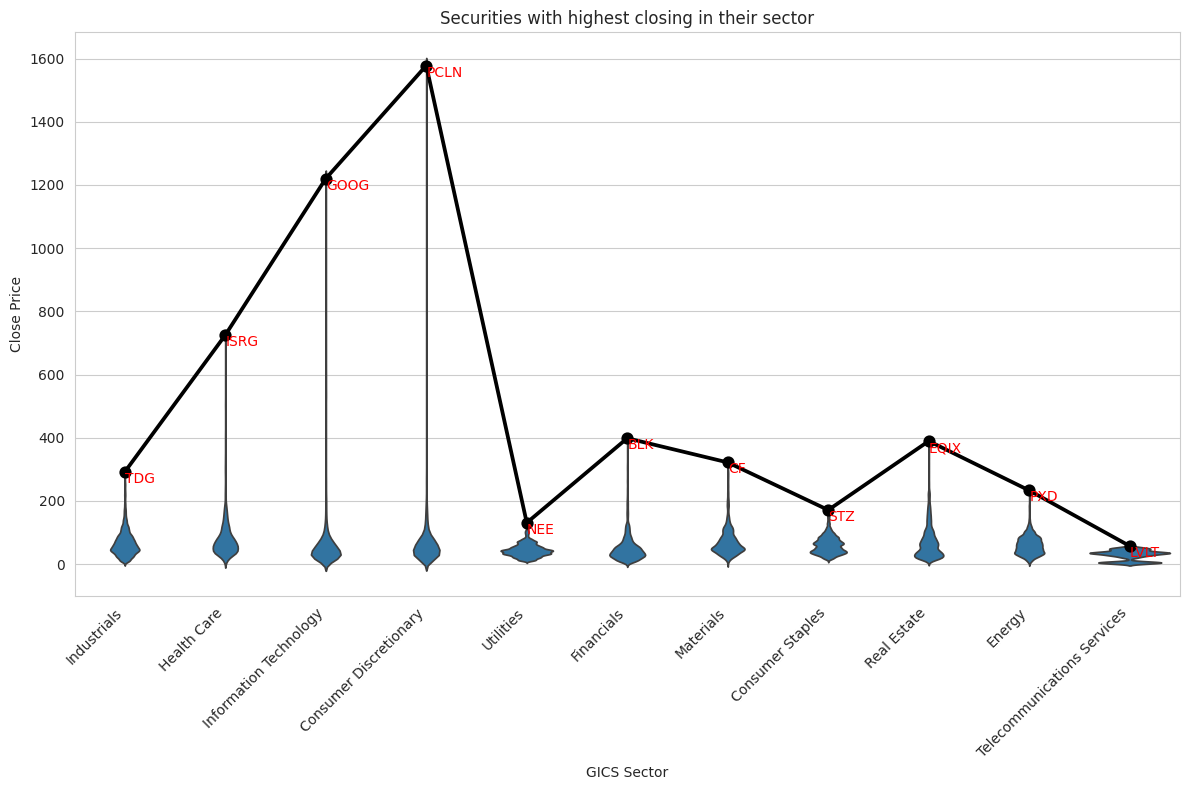

In [120]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.violinplot(data=merged_data, x='GICS Sector', y='close', inner=None)
sns.pointplot(data=merged_data.groupby('GICS Sector')['close'].max().reset_index(),
              x='GICS Sector', y='close', color='black', markers='o')
for index, row in merged_data.loc[merged_data.groupby('GICS Sector')['close'].idxmax()].iterrows():
    plt.text(row['GICS Sector'], row['close'], row['Ticker symbol'], color='red', ha="left", va="top")
plt.xlabel('GICS Sector')
plt.ylabel('Close Price')
plt.title('Securities with highest closing in their sector')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


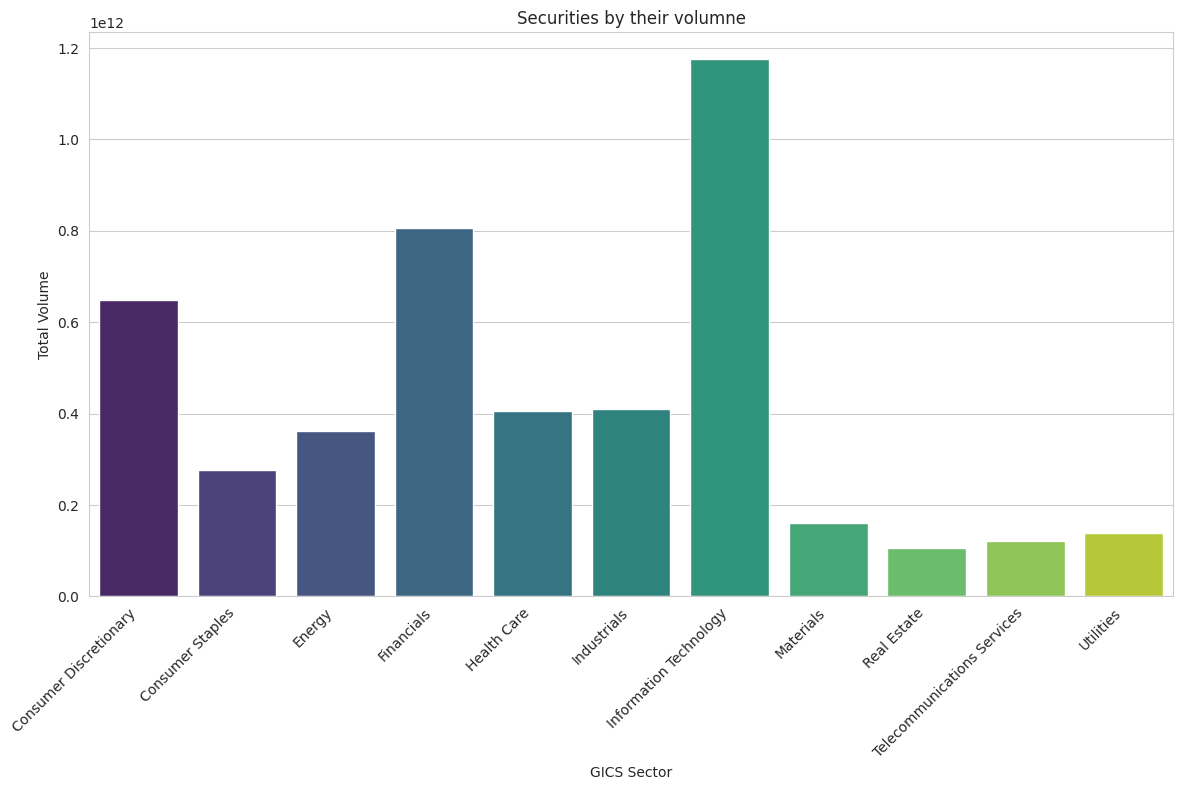

In [121]:
sum_volume = merged_data.groupby('GICS Sector')['volume'].sum().reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=sum_volume, x='GICS Sector', y='volume', palette='viridis')
plt.xlabel('GICS Sector')
plt.ylabel('Total Volume')
plt.title('Securities by their volumne')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [122]:
data.columns

Index(['Ticker symbol', 'Security', 'SEC filings', 'GICS Sector',
       'GICS Sub Industry', 'Address of Headquarters', 'Date first added',
       'CIK', 'date', 'symbol', 'open', 'close', 'low', 'high', 'volume'],
      dtype='object')

In [54]:
prc.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [55]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


merged_data = pd.merge(data[['date', 'symbol', 'GICS Sector']],
                       prc[['date', 'symbol', 'open', 'close', 'low', 'high', 'volume']],
                       on=['date', 'symbol'])


X = merged_data[['open', 'close', 'low', 'high', 'volume']]
y = merged_data['close']

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))


X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)


X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
model = Model(input_size, hidden_size, output_size)


criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    predicted = model(X_test)
    mse = criterion(predicted, y_test)
print(f'Mean Squared Error: {mse:.4f}')


Epoch [10/100], Loss: 0.0027
Epoch [20/100], Loss: 0.0022
Epoch [30/100], Loss: 0.0013
Epoch [40/100], Loss: 0.0008
Epoch [50/100], Loss: 0.0005
Epoch [60/100], Loss: 0.0002
Epoch [70/100], Loss: 0.0001
Epoch [80/100], Loss: 0.0000
Epoch [90/100], Loss: 0.0000
Epoch [100/100], Loss: 0.0000
Mean Squared Error: 0.0000


In [56]:
# Inference
with torch.no_grad():
    predicted = model(X_test)
    predicted_unscaled = scaler_y.inverse_transform(predicted.numpy())  # Convert back to original scale
    actual_unscaled = scaler_y.inverse_transform(y_test.numpy().reshape(-1, 1))  # Convert back to original scale
    mse = criterion(predicted, y_test)
    print(f'Mean Squared Error: {mse:.4f}')

# Convert Torch tensors to numpy arrays
predicted_np = predicted_unscaled.flatten()
actual_np = actual_unscaled.flatten()

# Create a DataFrame to compare predicted and actual closing prices
comparison_df = pd.DataFrame({'Actual Close': actual_np, 'Predicted Close': predicted_np})
print(comparison_df)


Mean Squared Error: 0.0000
        Actual Close  Predicted Close
0          41.590000        44.761215
1          15.270000        24.551680
2          22.629999        25.004986
3          69.690002        70.264297
4          51.259998        54.262478
...              ...              ...
170248     22.670000        29.137793
170249     32.790005        29.026440
170250     61.740002        58.931358
170251     51.039997        53.374519
170252     72.579994        72.440399

[170253 rows x 2 columns]


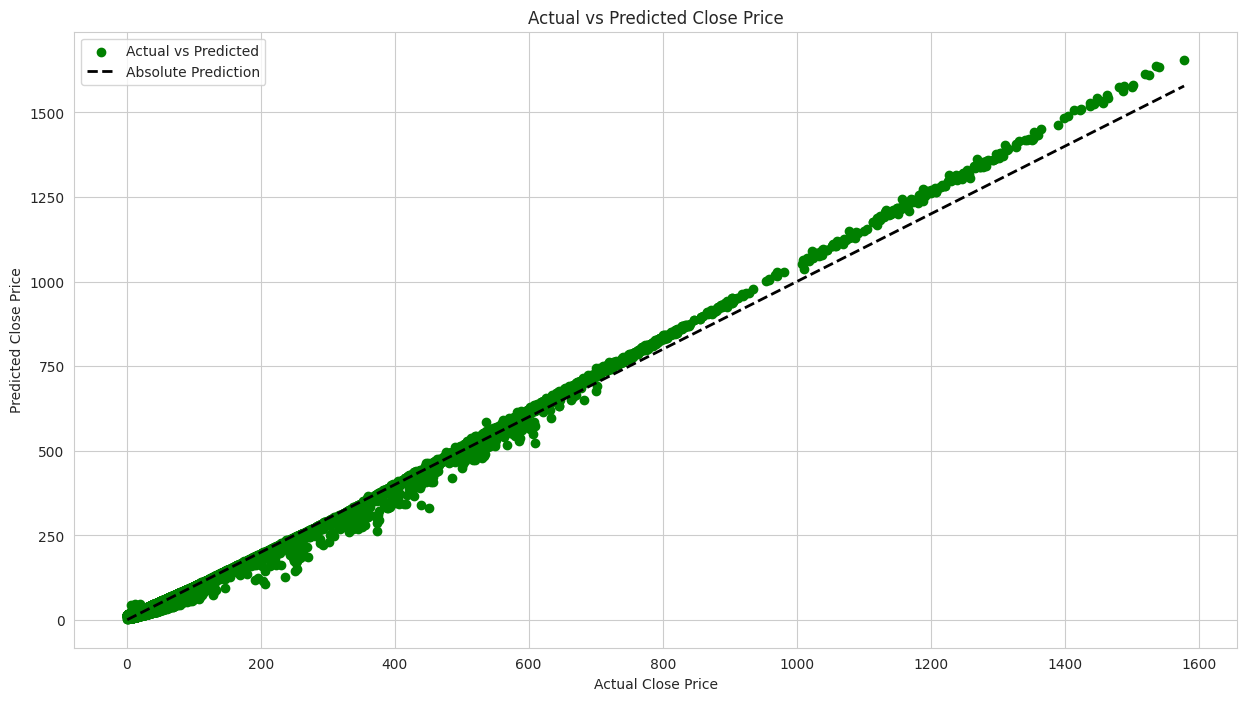

In [57]:
y_test_unscaled = actual_unscaled # Plot actual vs predicted values
plt.figure(figsize=(15, 8))
plt.scatter(y_test_unscaled, predicted_unscaled, color='Green', label='Actual vs Predicted')
plt.plot([y_test_unscaled.min(), y_test_unscaled.max()], [y_test_unscaled.min(), y_test_unscaled.max()], 'k--', lw=2, label='Absolute Prediction')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()


In [58]:
pip install torchviz

In [59]:
pip install torchsummary


In [61]:
import torch
import torch.nn as nn
from torchsummary import summary

class ComplexModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(ComplexModel, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_sizes[0])
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_sizes[i], hidden_sizes[i+1]) for i in range(len(hidden_sizes) - 1)
        ])
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for hidden_layer in self.hidden_layers:
            x = torch.relu(hidden_layer(x))
        x = self.output_layer(x)
        return x

# Define model parameters
input_size = X_train.shape[1]
hidden_sizes = [128, 64, 32]
output_size = 1

# Initialize model
complex_model = ComplexModel(input_size, hidden_sizes, output_size)

# Display model summary
summary(complex_model, input_size=(input_size,))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]             768
            Linear-2                   [-1, 64]           8,256
            Linear-3                   [-1, 32]           2,080
            Linear-4                    [-1, 1]              33
Total params: 11,137
Trainable params: 11,137
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.models as models
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.autograd import Variable
from torchviz import make_dot

batch_size = 3
learning_rate = 0.0002
epoch = 50

# Load the pre-trained ResNet-50 model
resnet = models.resnet50(pretrained=True)

# Create a dummy input tensor
dummy_input = torch.randn(1, 3, 224, 224)  # Assuming input size is 224x224

# Visualize the model
make_dot(resnet(dummy_input), params=dict(resnet.named_parameters()))


In [83]:
import pandas as pd

# Inference
with torch.no_grad():
    predicted = model(X_test)
    predicted_unscaled = scaler_y.inverse_transform(predicted.numpy())  # Convert back to original scale
    actual_unscaled = scaler_y.inverse_transform(y_test.numpy().reshape(-1, 1))  # Convert back to original scale
    mse = criterion(predicted, y_test)
    print(f'Mean Squared Error: {mse:.4f}')

# Calculate the difference between actual and predicted closing prices
difference = actual_unscaled.flatten() - predicted_unscaled.flatten()

# Create a DataFrame to compare actual and predicted closing prices along with the difference
comparison_df = pd.DataFrame({'Actual Close': actual_unscaled.flatten(), 'Predicted Close': predicted_unscaled.flatten(), 'Difference': difference})
print(comparison_df)


Mean Squared Error: 0.0000
        Actual Close  Predicted Close  Difference
0          41.590000        44.761215   -3.171215
1          15.270000        24.551680   -9.281680
2          22.629999        25.004986   -2.374987
3          69.690002        70.264297   -0.574295
4          51.259998        54.262478   -3.002480
...              ...              ...         ...
170248     22.670000        29.137793   -6.467793
170249     32.790005        29.026440    3.763565
170250     61.740002        58.931358    2.808643
170251     51.039997        53.374519   -2.334522
170252     72.579994        72.440399    0.139595

[170253 rows x 3 columns]


In [75]:
# Find the ticker symbol with the minimum absolute difference
min_diff_row = comparison_df.loc[comparison_df['Difference'].idxmin()]
print("Ticker Symbol with the Least Difference:")
print(min_diff_row)


Ticker Symbol with the Least Difference:
Actual Close       1536.780029
Predicted Close    1637.802124
Difference         -101.022095
Name: 67135, dtype: float32
